# Wheelchair Charging Stations for the Disabled in Seoul

## Import libraries

In [1]:
# For data manipulation and analysis
import pandas as pd
from pandas import Series, DataFrame

# For scientific computing
import numpy as np

# For clustering algorithm (K-Means)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import euclidean_distances
from sklearn.metrics import silhouette_score

# For visulization
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

## Load csv data

In [2]:
import os 
os.getcwd() # Get my working directory (current working directory)

'/Users/baknarim/barrier_free_project'

In [9]:
df=pd.read_csv('DATASET.csv', index_col='ID')
df.head()

,DISALBED,SHOPPING MALL,TAXI,EMPLOYEE,WELFARE CENTER,CARD
ID,,,,,,
11710107,1235,6,2774,3,0,3205
11530103,305,0,92,0,2,471
11545101,437,6,156,27,0,5397
11500104,2654,4,13316,0,4,1911
11110146,97,0,0,0,0,573


## Data scaling (MinMaxScaler)

In [10]:
# Scaler: StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

scaled = MinMaxScaler().fit_transform(df)
features = ['DISALBED', 'SHOPPING MALL', 'TAXI', 'EMPLOYEE','WELFARE CENTER','CARD']
pd.DataFrame(scaled, columns=features)

,DISALBED,SHOPPING MALL,TAXI,EMPLOYEE,WELFARE CENTER,CARD
0,0.225077,0.30,0.073456,0.1,0.000000,0.268425
1,0.055586,0.00,0.002436,0.0,0.142857,0.039447
2,0.079643,0.30,0.004131,0.9,0.000000,0.452010
3,0.483689,0.20,0.352611,0.0,0.285714,0.160050
4,0.017678,0.00,0.000000,0.0,0.000000,0.047990
...,...,...,...,...,...,...
462,0.114270,0.00,0.000000,0.0,0.071429,0.059966
463,0.000000,0.00,0.000000,0.0,0.000000,0.000000
464,0.171496,0.00,0.151758,0.0,0.071429,0.116080
465,0.121196,0.05,0.075654,0.0,0.000000,0.229481


## Principal Component Analysis

In [11]:
pca = PCA(n_components=3) # n=3, 0.835 (83.5%) (Explained variance ratio should be at least 0.8)
values_pca = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data=values_pca, columns = ['PC-1', 'PC-2','PC-3'])
print('Explained variance ratio :', pca.explained_variance_ratio_)

Explained variance ratio : [0.56029331 0.14904345 0.12610257]


In [12]:
principalDf

,PC-1,PC-2,PC-3
0,0.291532,0.062184,-0.133359
1,-0.069776,-0.040247,0.072512
2,0.348903,0.417605,-0.477036
3,0.489903,-0.193600,0.243538
4,-0.121093,0.013001,0.018180
...,...,...,...
462,-0.040099,-0.029795,0.062412
463,-0.154573,-0.020688,0.010892
464,0.068677,-0.009016,0.150403
465,0.076254,0.111934,0.054305


Text(0, 0.5, 'PC')

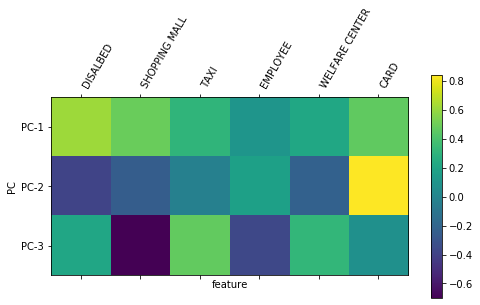

In [16]:
# visualization of coefficient
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["PC-1", "PC-2","PC-3"])
plt.colorbar()
plt.xticks(range(len(features)),features, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("PC")

## Elbow method

In [17]:
# Using the elbow method to determine the optimal number of clusters for k-means clustering

def elbow_method(data):
    K = range(2,6) 
    KM = [KMeans(n_clusters=k).fit(data) for k in K] 
    centroids = [k.cluster_centers_ for k in KM] 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids] 
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    

    # Elbow curve
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    
    kIdx = 1
    ax.plot(K, avgWithinSS, 'b*-')
    ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=15, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
    
    kIdx = 2
    ax.plot(K, avgWithinSS, 'b*-')
    ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=10, 
    markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
    
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for K-Means clustering')

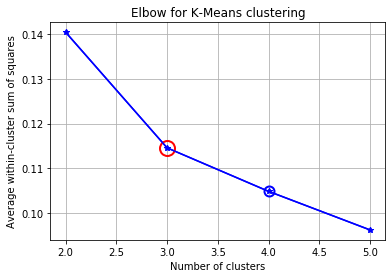

In [18]:
elbow_method(values_pca) # Optimal K for K-Means = 3

## K-Means Clustering

[]

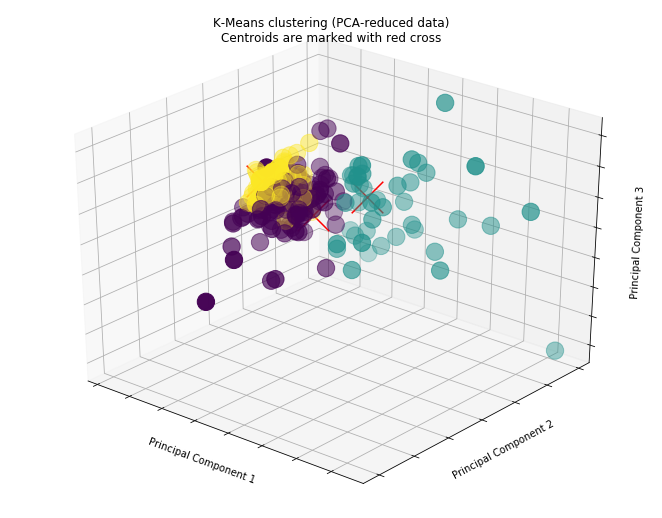

In [19]:
# K-Means Clustering

fig = plt.figure(1, figsize=(9, 7)) 
ax = Axes3D(fig, elev=-150, azim=230)

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=5) # Opitmal K = 3
kmeans.fit(values_pca)

ax.scatter(values_pca[:, 0], values_pca[:, 1], values_pca[:, 2], 
           c=kmeans.labels_.astype(np.float), s=300
          )

cntr = kmeans.cluster_centers_
ax.scatter(cntr[0][0],cntr[0][2],cntr[0][1],c = 'red',marker="x",s=1000)
ax.scatter(cntr[1][0],cntr[1][2],cntr[1][1],c = 'red',marker="x",s=1000)
ax.scatter(cntr[2][0],cntr[2][2],cntr[2][1],c = 'red',marker="x",s=1000)


# For visualization

ax.set_title('K-Means clustering (PCA-reduced data)\n'
             'Centroids are marked with red cross')

ax.set_xlabel("Principal Component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Principal Component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Principal Component 3")
ax.w_zaxis.set_ticklabels([])

In [20]:
#Labeling

df['CLUSTERING RESULT']=kmeans.labels_

In [21]:
df.head()

,DISALBED,SHOPPING MALL,TAXI,EMPLOYEE,WELFARE CENTER,CARD,CLUSTERING RESULT
ID,,,,,,,
11710107,1235,6,2774,3,0,3205,0
11530103,305,0,92,0,2,471,2
11545101,437,6,156,27,0,5397,0
11500104,2654,4,13316,0,4,1911,1
11110146,97,0,0,0,0,573,2


In [22]:
df.to_excel('BARRIER_FREE.xlsx')